<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula9_funcao_sigmoide_e_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação e Função Sigmoide


## Objetivos

Com este código, você irá:
- Explorar o conceito de classificação
- Explorar a função sigmoide (também conhecida como função logística)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

## Problemas de Classificação

Exemplos de problemas de classificação são coisas como:
- Identificar se o e-mail é SPAM ou não
- Determinar se um tumor é maligno ou beningo

Especificamente, esses são problemas de classificação binária, onde só existem dois possíveis valores de saída.
Esses valores de saída podem ser descritos como 'positivo'/'negativo', 'sim'/'não', 'verdadeiro'/'falso' ou '1'/'0'

As figuras feitas para problemas de classificação geralmente usam símbolos para indicar o valor de saída de uma amostra. Nos gráficos abaixo, 'X' é usado para representar valores positivos e 'O' é usado para representar valores negativos.

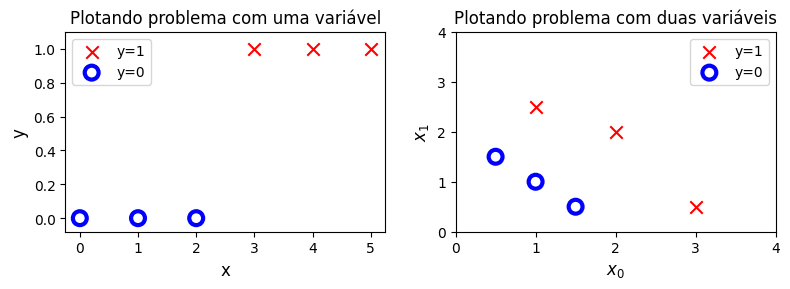

In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('Plotando problema com uma variável')
ax[0].legend()


X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])
pos      = y_train2 == 1
neg      = y_train2 == 0

ax[1].scatter(X_train2[pos,0], X_train2[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax[1].scatter(X_train2[neg,0], X_train2[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('Plotando problema com duas variáveis')
ax[1].legend()
plt.tight_layout()
plt.show()


## Função Sigmoide

Conforme discutido, num problema de classificação, nós podemos começar pensando num modelo de regressão $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, para prever $y$ dado $x$.
- Entretanto, nós gostaríamos que as previsões feitas pelo modelo de classificação fossem entre 0 e 1, uma vez que nossa variável de saída é ou 0 ou 1.
- Isso pode ser obtido usando a função sigmoide, que mapeia todos os valores de entrada para valores entre 0 e 1.


Vamos agora implementar essa função.


## Fórmula para a função sigmoide

A equação para a função sigmoide é

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

No caso da Regressão Logística, z (entrada da função sigmoide) é a saída do modelo de regressão linear.
- No caso de uma única amostra, $z$ é um escalar
- No caso de múltiplas amostras (exemplos), $z$ pode ser um vetor com $m$ valores, um para cada amostra
- A implementação da função sigmoide deve levar em conta essas duas possibildades de formato de dados de entrada

NumPy tem a função chamada [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), que fornece uma forma conveninente para calcular a exponencial ( $e^{z}$) de todos os elementos presentes na array de entrada (`z`).

Isso também funciona para escalares, conforme mostrado abaixo.

In [4]:
# Entrada na forma de array
array_de_entrada = np.array([1,2,3])
exp_array   = np.exp(array_de_entrada)

print("entrada da exp:", array_de_entrada)
print("saída da exp:", exp_array)

# Entrada dada por um único escalar
valor_de_entrada = 1
exp_val = np.exp(valor_de_entrada)

print("entrada da exp:", valor_de_entrada)
print("saída exp:", exp_val)

entrada da exp: [1 2 3]
saída da exp: [ 2.72  7.39 20.09]
entrada da exp: 1
saída exp: 2.718281828459045


A função `sigmoide` é implementada em Python conforme mostrado abaixo

In [6]:
def sigmoide(z):
    """
    Calcula o valor sigmoide de z

    Argumento:
        z (ndarray): Um escalar ou numpy array de qualquer tamanho.

    Retorna:
        g (ndarray): sigmoid(z), com o mesmo shape de z

    """

    g = 1/(1+np.exp(-z))

    return g

Vamos avaliar a saída dessa função para diferentes valores de `z`

In [7]:
# Gerando uma array com valores entre -10 e 10
z_tmp = np.arange(-10,11)

# Usando a função
y = sigmoide(z_tmp)

# Mostrando entrada e saída lado a lado
print("Entrada (z), Saída (sigmoid(z))")

print(np.c_[z_tmp, y])

Entrada (z), Saída (sigmoid(z))
[[-1.00e+01  4.54e-05]
 [-9.00e+00  1.23e-04]
 [-8.00e+00  3.35e-04]
 [-7.00e+00  9.11e-04]
 [-6.00e+00  2.47e-03]
 [-5.00e+00  6.69e-03]
 [-4.00e+00  1.80e-02]
 [-3.00e+00  4.74e-02]
 [-2.00e+00  1.19e-01]
 [-1.00e+00  2.69e-01]
 [ 0.00e+00  5.00e-01]
 [ 1.00e+00  7.31e-01]
 [ 2.00e+00  8.81e-01]
 [ 3.00e+00  9.53e-01]
 [ 4.00e+00  9.82e-01]
 [ 5.00e+00  9.93e-01]
 [ 6.00e+00  9.98e-01]
 [ 7.00e+00  9.99e-01]
 [ 8.00e+00  1.00e+00]
 [ 9.00e+00  1.00e+00]
 [ 1.00e+01  1.00e+00]]


Os valores da esquerda são `z`, e os valores da coluna da esquerda são `sigmoid(z)`. Como você pode observar, os valores de entrada vão de -10 a 10, e os valores de saída vão de 0 a 1.

Vamos agora plotar essa função usando a biblioteca `matplotlib`.

Text(0.5, 0, 'z')

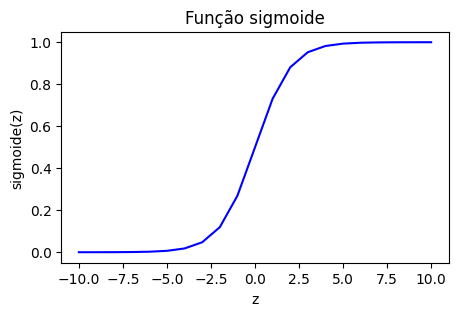

In [9]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Função sigmoide")
ax.set_ylabel('sigmoide(z)')
ax.set_xlabel('z')

Conforme você pode observar, a função sigmoide tende a `0` conforme `z` atinge grandes valores negativos e tende a `1` conforme `z` atinge grandes valores positivos

## Regressão Logística

Um modelo de Regressão Logística aplica a função sigmoide para o modelo de regressão linear, conforme mostrado abaixo:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$

  onde

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$


Para os dados abaixo, busque encontrar 'manualmente' quais seriam valores adequados para 'w' e 'b' que fazem com que o modelo seja capaz de diferenciar um tumor maligno de um tumor benigno.

In [18]:
x_trein = np.array([0., 1, 2, 3, 4, 5])
y_trein = np.array([0,  0, 0, 1, 1, 1])

w = 4
b = -4

z = w*x_trein + b
f = sigmoide(z)

print(z.shape)
print(f.shape)

# Criando uma tabela na forma de pandas dataframe

import pandas as pd # importa a biblioteca pandas

df = pd.DataFrame({
    'Entrada (x)': x_trein,
    'z': z,
    'Prob. de ser malígno': f,
    'Alvo': y_trein
})

pd.set_option('display.max_rows', None)
display(df)

(6,)
(6,)


,Entrada (x),z,Prob. de ser malígno,Alvo
0,0.0,-4.0,0.017986,0
1,1.0,0.0,0.500000,0
2,2.0,4.0,0.982014,0
3,3.0,8.0,0.999665,1
4,4.0,12.0,0.999994,1
5,5.0,16.0,1.000000,1


Abaixo nós plotamos a curva de probabilidade obtida por meio do cálculo da saída do modelo para diferentes valores para x

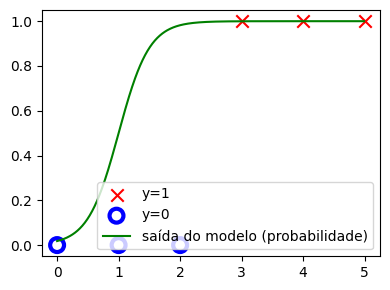

In [19]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

x = np.arange(0,5,0.01)
z = w*x + b
f = sigmoide(z)
ax.plot(x, f, c = 'green',label="saída do modelo (probabilidade)")
ax.legend()


plt.tight_layout()
plt.show()

## Parabéns

Com este código, você:
- Explorou o conceito de classificação
- implementou e utilizou a função sigmoide dentro do contexto de Regressão Logística